<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# set ddof to 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [68]:
sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
sales

array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

In [3]:
# Mean
sales_mean = sales.sum()/len(sales)
sales_mean

3052.714285714286

In [69]:
# Variance
num = []
for sal in sales:
  result = sal - sales_mean
  result_squared = result**2
  num.append(result_squared)

num = np.array(num)
var = num.sum()/len(num)
var

183761.06122448976

In [70]:
# Standard deviation
std = var**(1/2)
std

428.67360686714756

In [71]:
# df way
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers = [127, 80, 105, 92, 120, 115, 93]
data={'sales':sales, 'customers':customers}
df = pd.DataFrame(data)
df

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [72]:
cust = np.array([127, 80, 105, 92, 120, 115, 93])
cust

array([127,  80, 105,  92, 120, 115,  93])

In [73]:
np.cov(sales, cust, ddof=1)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [74]:
# df way
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [75]:
cus_mean = cust.mean()
cus_mean

104.57142857142857

In [76]:
# Variance and Standard Deviation
num = []
for customer in cust:
  result = customer - cus_mean
  result_squared = result**2
  num.append(result_squared)

num = np.array(num)
var = num.sum()/len(num)
print(var)
print(var**(1/2))

249.3877551020408
15.792015549069118


In [77]:
# std for sales = 428.67360686714756
# cov for sales = 7604.35714286
# std for customers = 15.792015549069118
# cov for customers = 7604.35714286

r = (7604.35714286 /(428.67360686714756 * 15.792015549069118))
r

1.123306307451128

In [78]:
np.corrcoef(sales, cust)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

In [79]:
# df way
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


In [80]:
df.describe()

,sales,customers
count,7.000000,7.000000
mean,3052.714286,104.571429
std,463.020415,17.057326
min,2400.000000,80.000000
25%,2743.500000,92.500000
50%,3027.000000,105.000000
75%,3377.500000,117.500000
max,3700.000000,127.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [81]:
# import
df_ti = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', names=None)
df_ti.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [82]:
df_ti.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [83]:
df_ti.isnull().sum()

Unnamed: 0             0
pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [84]:
df_ti.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [85]:
df_ti = df_ti[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'has_cabin_number']]
df_ti.head()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,1


In [86]:
df_ti.isnull().sum()

pclass              1
survived            1
age                 0
sibsp               1
parch               1
fare                2
has_cabin_number    0
dtype: int64

In [87]:
df_ti = df_ti.fillna(0)
df_ti.head()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,1


In [88]:
df_ti.drop([1309])

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1.0,1.0,29.000000,0.0,0.0,211.3375,1
1,1.0,1.0,0.916700,1.0,2.0,151.5500,1
2,1.0,0.0,2.000000,1.0,2.0,151.5500,1
3,1.0,0.0,30.000000,1.0,2.0,151.5500,1
4,1.0,0.0,25.000000,1.0,2.0,151.5500,1
5,1.0,1.0,48.000000,0.0,0.0,26.5500,1
6,1.0,1.0,63.000000,1.0,0.0,77.9583,1
7,1.0,0.0,39.000000,0.0,0.0,0.0000,1
8,1.0,1.0,53.000000,2.0,0.0,51.4792,1
9,1.0,0.0,71.000000,0.0,0.0,49.5042,0


In [89]:
df_ti.cov()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,0.705453,-0.126482,-3.951584,0.053924,0.013952,-24.150423,-0.249407
survived,-0.126482,0.236181,-0.314103,-0.013932,0.034861,6.156049,0.061424
age,-3.951584,-0.314103,165.850021,-2.557851,-1.458263,113.462982,1.463138
sibsp,0.053924,-0.013932,-2.557851,1.084413,0.336722,8.653922,-0.003858
parch,0.013952,0.034861,-1.458263,0.336722,0.748735,9.932434,0.013372
fare,-24.150423,6.156049,113.462982,8.653922,9.932434,2676.557808,10.971645
has_cabin_number,-0.249407,0.061424,1.463138,-0.003858,0.013372,10.971645,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

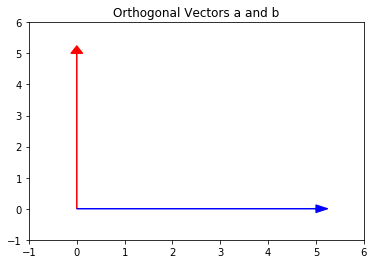

In [91]:
fig, ax = plt.subplots()

# Two orthogonal vectors.  Synonym for orthogonal is perpendicular
vector_a = [0,5]
vector_b = [5,0]

# plot
plt.arrow(0,0, vector_a[0], vector_a[1], head_width=.25, head_length=.25, color='red')
plt.arrow(0,0, vector_b[0], vector_b[1], head_width=.25, head_length=.25, color='blue')
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)
plt.title("Orthogonal Vectors a and b")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [92]:
# Let's see if vector an and b are orthogonal.

vector_a = [-5, 3, 7]
vector_b = [6, -8, 2]

# Dot product to see if orthogonal. If they were, their dot product would have equalled 0, it equals -40
np.dot(vector_a, vector_b)

-40

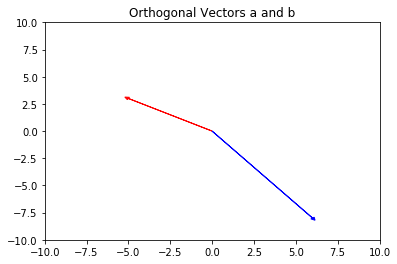

In [94]:
# plot to show they are not orthogonal
fig, ax = plt.subplots()

plt.arrow(0,0, vector_a[0], vector_a[1], head_width=.25, head_length=.25, color='red')
plt.arrow(0,0, vector_b[0], vector_b[1], head_width=.25, head_length=.25, color='blue')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

plt.title("Orthogonal Vectors a and b")
plt.show()

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [95]:
vector_c = [2, -15, 6, 20]
vector_c

[2, -15, 6, 20]

In [96]:
# Calculate the Norm squared
(np.linalg.norm(vector_c))**2

665.0

In [97]:
# Calculate dot product of vector c
np.dot(vector_c, vector_c)

665

In [0]:
# Calculate vector c transposed * c
c_t = np.transpose(vector_c)

In [99]:
np.dot(vector_c, c_t)

665

In [0]:
# All 3 equal 665 

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

For d:


\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}


For e:


\begin{align}
e = \begin{bmatrix} 7 \\ 12 \\ -8 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \\0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\1 \end{bmatrix} = 7\hat{i} + 12\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

Using Latex:

\begin{align}
 ||f|| = \sqrt{4^2 + 12^2 + 11^2 + 9^2 + 2^2} = \sqrt{16 + 144 + 121 + 81 + 4} = \sqrt{366} = 19.131126469708992
\end{align} \\

 \begin{align}
 \hat{f} = \frac{1}{||f||}f = \frac{1}{19}\begin{bmatrix} 4 \\ 12 \\ 11 \\9\\  2 \end{bmatrix} = \begin{bmatrix} \frac{4}{19} \\ \frac{12}{19} \\ \frac{11}{19} \\ \frac{9}{19} \\ \frac{2}{19} \end{bmatrix}
\end{align}



In [101]:
# Using library
vector_f = np.array([4, 12, 11, 9, 2]).astype(float)
vector_f

array([ 4., 12., 11.,  9.,  2.])

In [102]:
# Calculate the Norm
norm = np.linalg.norm(vector_f)
norm

19.131126469708992

In [103]:
# Turn vector_f into unit vector 
vector_f =vector_f/norm
vector_f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

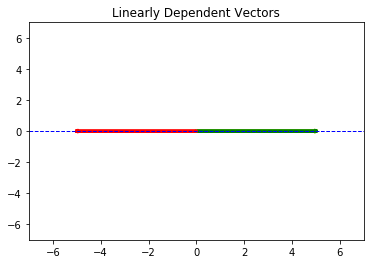

In [104]:
# Plot linearly dependent vectors
fig, ax = plt.subplots()

# Vector 1
v1 = [5, 0]

# Scaled vectors
v2 = np.multiply(1, v1)
v3 = np.multiply(-1, v1)

# X and Y lims
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)

# Get vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=.05, color='yellow')
plt.arrow(0,0, v1[0], v1[1], linewidth=3, head_width=.05, head_length=.05, color='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=.05, color='red')

plt.title("Linearly Dependent Vectors")
plt.show()

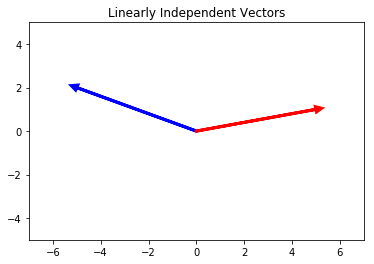

In [105]:
# Plot linearly independent vectors
fig, ax = plt.subplots()

# X and Y lims
ax.set_xlim((-7, 7))
ax.set_ylim((-5, 5))

# vectors
v4 = [-5,2]
v5 = [5, 1]



# Plot vectors 
plt.arrow(0,0, v4[0], v4[1], linewidth=3, head_width=.25, head_length=.25, color='blue')
plt.arrow(0,0, v5[0], v5[1], linewidth=3, head_width=.25, head_length=.25, color='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [106]:
g = [ 1, 2]
h = [4, 8]
matrix = np.matrix([g,h])
matrix

matrix([[1, 2],
        [4, 8]])

In [107]:
np.linalg.matrix_rank(matrix)

1

In [0]:
# The span of g and h is 1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l = [1,2,3]
m = [-1, 0, 7]
n = [4, 8, 2]

In [110]:
matrix1 = np.matrix([l, m, n])
matrix1

matrix([[ 1,  2,  3],
        [-1,  0,  7],
        [ 4,  8,  2]])

In [111]:
np.linalg.matrix_rank(matrix1)

3

In [0]:
# The span of l, m, n is 3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [113]:
v1 = [0, 5]
v2 = [5, 0]
matrix3 = np.matrix([v1, v2])
matrix3

matrix([[0, 5],
        [5, 0]])

In [114]:
np.linalg.matrix_rank(matrix3)

2

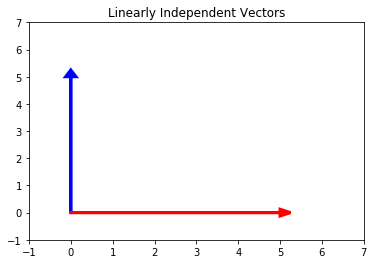

In [117]:
# Plot linearly independent vectors
fig, ax = plt.subplots()

# vectors

# X and Y lims
ax.set_xlim(-1,7)
ax.set_ylim(-1,7)

# Plot vectors 
plt.arrow(0,0, v1[0], v1[1], linewidth=3, head_width=.25, head_length=.25, color='blue')
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.25, head_length=.25, color='red')

plt.title("Linearly Independent Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

The basis of a vector space V is a set of vectors that are linearly independent and that span the vector space V. A set of vectors spans a space if their linear combinations fill the space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [118]:
P = ([1,2,3], [-1,0,7], [4,8,2])
P

([1, 2, 3], [-1, 0, 7], [4, 8, 2])

In [119]:
# The rank of P is 3
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

Rank tells us how that matrix spans the vector space. The rank of a matrix is the dimension of the vector space named by its columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = np.array([1, 3])
w = np.array([-1, 2])


In [159]:
proj = ((np.dot(v,w) / np.dot(v, v)) * v)
proj

array([0.5, 1.5])

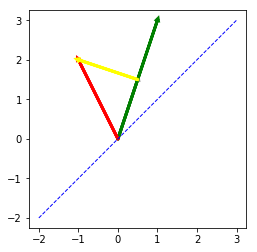

In [160]:
fig, ax = plt.subplots()

# Axis Bounds
ax.set_xlim(-2,3)          
ax.set_ylim(-1,6)

# Original Vector
v = np.array([1,3])
w = np.array([-1,2])
c = np.dot(v, w)/np.dot(v,v)
proj = c*v
x_minus_proj = w-proj

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')


plt.show();

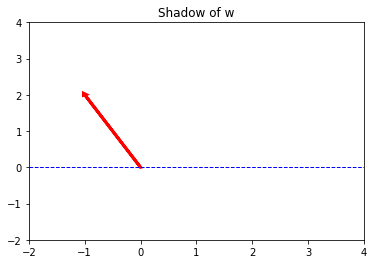

In [163]:
fig, ax = plt.subplots()

# Axis Bounds
ax.set_xlim(-2,4)          
ax.set_ylim(-2,4)

# Original Vector
# v = np.array([1,3])
w = np.array([-1,2])
proj = [.5,1.5]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Shadow of w")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()